../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv: 1 failed experiments using turbo.gpu.release have been removed (the faulty experiments have been stored in failed_turbo.gpu.release-v1.2.8-mzn2024.csv).
Number of instances: 94
average_vars_increase=nan
average_cons_increase=nan
max_vars_increase=111.62
max_cons_increase=486.81
median_vars_increase=1.76
median_cons_increase=3.17
stddev_vars_increase=nan
stddev_cons_increase=nan
leq_10x_increase=67


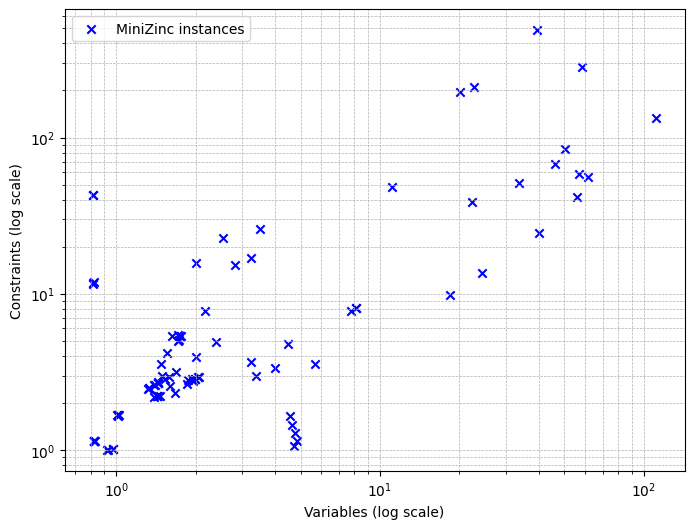

average_vars_increase=nan
average_cons_increase=nan
max_vars_increase=1130.87
max_cons_increase=1834.24
median_vars_increase=10.21
median_cons_increase=7.39
stddev_vars_increase=nan
stddev_cons_increase=nan
leq_10x_increase=45


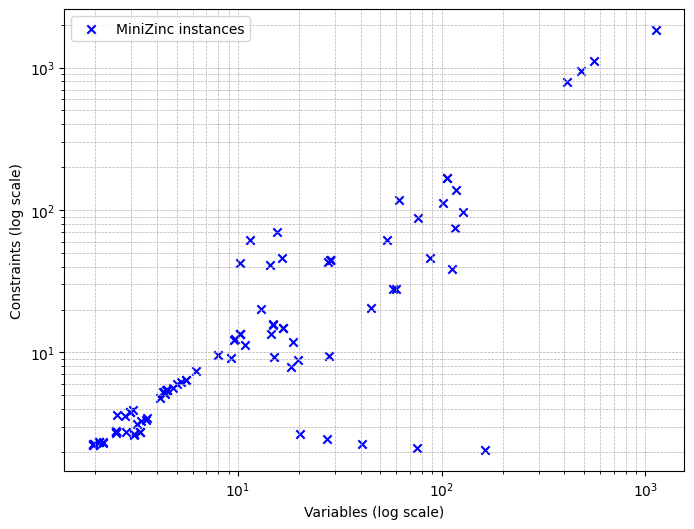

average_vars_increase=nan
average_cons_increase=nan
max_vars_increase=258.53
max_cons_increase=607.26
median_vars_increase=4.46
median_cons_increase=4.85
stddev_vars_increase=nan
stddev_cons_increase=nan
leq_10x_increase=57


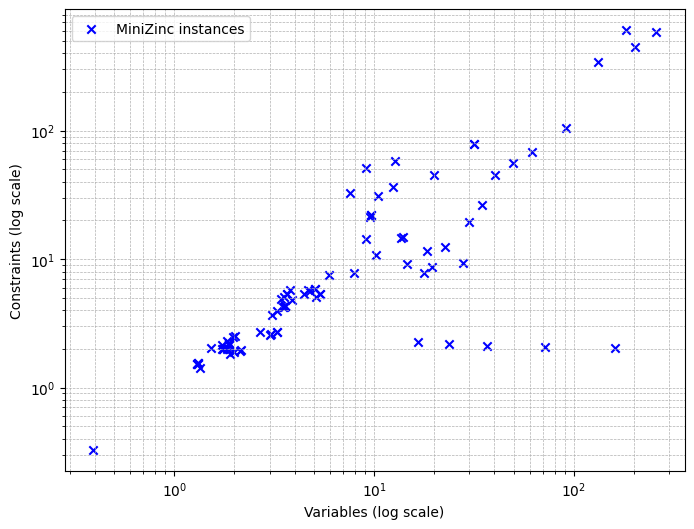

In [4]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

# print("WORDPRESS 7")
# print("===========\n")
# df = pd.read_csv("~/repositories/lattice-land/turbo/wordpress7_ac1_backtrack_analysis.csv")
# analysis.analyze_fp_iterations_on_backtrack(df)
# print("ACCAP 4")
# print("===========\n")
# df = pd.read_csv("~/repositories/lattice-land/turbo/accap4_ac1_backtrack_analysis.csv")
# analysis.analyze_fp_iterations_on_backtrack(df)
# print("GFD N55")
# print("===========\n")
# df = pd.read_csv("~/repositories/lattice-land/turbo/gfdn55_ac1_backtrack_analysis.csv")
# analysis.analyze_fp_iterations_on_backtrack(df)

df = analysis.read_experiments([
  # "../campaign/aion/turbo.cpu.release-v1.2.7-mzn2024-analysis.csv",
  "../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv"
])
df = df[df['uid'] == "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0"]

mzn_challenge = pd.read_csv("../benchmarking/mzn2024_noyumi.csv")
mzn_challenge['model_data_file'] = mzn_challenge['model'] + ' - ' + mzn_challenge['data_file']
# print(mzn_challenge)
mzn_data = set(mzn_challenge['model_data_file'])
df = df[df['model_data_file'].isin(mzn_data)]

# Instances that might have been solved during flattening.
df = df[~(df['nodes'].isna())]

# Print the number of rows
print(f"Number of instances: {df.shape[0]}")

# analysis.preprocessing_time_distribution(df)
# analysis.analyse_tnf_per_problem(df, False, 'parsed_variables', 'parsed_constraints', 'variables_after_simplification', 'constraints_after_simplification')
# analysis.heatmap_operators(df)

choco = analysis.read_experiments([
  "../campaign/aion/org.choco.choco-v4.10.18-mzn2024.csv"
])
choco = choco[choco['model_data_file'].isin(mzn_data)]
choco = choco.drop_duplicates(subset='model_data_file', keep='first')
choco.rename(columns={'variables': 'choco_vars', 'constraints': 'choco_cons'}, inplace=True)
df = df.merge(choco[['model_data_file', 'choco_vars', 'choco_cons']], on='model_data_file', how='left')

analysis.boxplot_tcn_increase(df, 'choco_vars', 'choco_cons')
analysis.boxplot_preprocessing_components(df, ['eliminated_entailed_constraints', 'eliminated_equality_constraints', 'eliminated_constraints_by_icse'])

analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'parsed_variables', 'parsed_constraints')
analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'tnf_variables', 'tnf_constraints')
analysis.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons','variables_after_simplification', 'constraints_after_simplification')
